<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-Redution" data-toc-modified-id="Dimensionality-Redution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality Redution</a></span><ul class="toc-item"><li><span><a href="#K_means" data-toc-modified-id="K_means-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>K_means</a></span><ul class="toc-item"><li><span><a href="#Cluster-Visualisation-on-original-data" data-toc-modified-id="Cluster-Visualisation-on-original-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Cluster Visualisation on original data</a></span><ul class="toc-item"><li><span><a href="#combination-heatmap" data-toc-modified-id="combination-heatmap-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>combination heatmap</a></span></li><li><span><a href="#character-heatmap" data-toc-modified-id="character-heatmap-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>character heatmap</a></span></li><li><span><a href="#Item-heatmap" data-toc-modified-id="Item-heatmap-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>Item heatmap</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Visualize-clusters-in-reduced-embedding" data-toc-modified-id="Visualize-clusters-in-reduced-embedding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize clusters in reduced embedding</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import cluster
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
with open("data/combination_index.json") as f:
    combination_index_dict = json.load(f)
    
with open("data/champion_index.json") as f:
    champion_index_dict = json.load(f)    
    
index_champion_dict = {value: key for key, value in champion_index_dict.items()}
index_combination_dict = {value: key for key, value in combination_index_dict.items()}

In [3]:
encoder_df = pd.read_csv("results/encoder_result.csv", index_col=0)
encoder_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.558213,-7.316642,2.624826,-1.193775,-2.266316,0.220998,-4.647477,1.424556,-0.217037,-3.050564,...,-6.040867,-1.309606,-0.900978,-1.950742,-0.399886,-4.857222,-0.995708,0.048287,-0.762482,9.913421
1,-2.050124,1.981892,4.309471,8.358296,1.392459,1.339937,3.691546,0.406302,-1.027066,5.259565,...,-0.450529,0.167975,5.157432,-4.396600,-3.565782,5.989324,-0.729486,0.369666,1.743094,-2.394161
2,0.511302,-5.204134,0.542837,4.282699,3.492670,0.923441,3.756793,-1.087258,-0.420877,0.177160,...,1.541250,1.103280,0.107983,-1.534583,0.202693,-5.429670,2.316610,-1.662875,-2.256009,2.238792
3,6.399126,0.113065,6.478312,4.484291,4.284851,-1.597178,6.387054,-2.918609,0.175338,-1.782682,...,2.777759,0.809011,0.816879,-1.058963,-2.008671,1.244361,1.027151,-4.149736,-3.131155,1.568256
4,6.847462,3.051220,4.085767,-0.026127,2.046548,-0.408061,0.564368,5.981429,3.350865,3.262176,...,-5.151231,1.299804,5.144845,2.650010,1.830177,11.071967,1.817870,-0.608682,-1.280096,-1.202539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,-2.914517,-7.480730,-2.743613,0.518860,0.870332,-2.903308,5.704366,0.963783,0.098051,-2.337825,...,-1.481808,1.070104,2.282967,-9.591190,-1.153864,-3.931351,-1.426054,-3.183903,-0.315432,0.617237
79994,-0.506315,0.059884,-0.796914,1.828665,-5.107642,-3.911323,1.559318,-4.540139,0.522469,3.474833,...,-3.155032,-2.077171,2.974024,0.502644,2.099222,-3.335037,-4.070394,-0.566718,-0.691650,-6.760777
79995,-1.488903,0.882074,3.339405,2.165346,0.752783,-0.003830,6.066749,-4.643505,3.516607,-4.930319,...,-1.737119,2.368982,-1.356480,-1.376248,-2.690521,6.914060,-0.704213,0.676228,-1.497634,-0.115077
79996,-6.336958,-1.675734,1.848253,0.028489,1.445320,0.247088,-2.689961,-2.870413,-1.206264,-1.733821,...,-2.170532,-0.628555,4.911302,4.495126,-2.690783,-1.750858,-4.320806,-1.488622,-1.031088,-7.933337


In [4]:
origial_df = pd.read_csv("results/training_data.csv", index_col=0)
origial_df.drop(index=origial_df[(origial_df["character_7_item_2"] == 10006) | (origial_df["character_7_item_3"] == 10006)].index, inplace=True)
origial_df

,Ranked,combination_Infiltrator,combination_Sniper,combination_MechPilot,combination_Chrono,combination_Set3_Celestial,combination_Rebel,combination_Set3_Mystic,combination_Demolitionist,combination_Set3_Brawler,...,character_11_name,character_11_item_1,character_11_item_2,character_11_item_3,character_11_star,character_12_name,character_12_item_1,character_12_item_2,character_12_item_3,character_12_star
0,1,0,0,0,0,3,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,6,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4,0,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,0,3,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,6,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,4,4,0,3,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
79995,5,2,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79996,6,2,0,1,2,0,1,0,2,4,...,0,0,0,0,0,0,0,0,0,0
79997,7,0,0,0,2,0,2,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
champions_name_columns = [col for col in origial_df.columns if col.startswith("character_") and col.endswith("name")]
champions_star_columns = [col for col in origial_df.columns if col.startswith("character_") and col.endswith("star")]

character_infos = []
for _, raw_row in origial_df.iterrows():
    character_stars = [0 for _ in range(len(index_champion_dict) + 1)]
    for champions_name_col, chamion_star_col in zip(champions_name_columns, champions_star_columns):
        character_idx = raw_row[champions_name_col]
        if character_idx == 0:
            continue
        
        character_stars[character_idx] = raw_row[chamion_star_col]

    character_infos.append(character_stars)
    
character_df = pd.DataFrame(character_infos, columns=["None"] + list(champion_index_dict.keys()))
character_df.drop(columns=['None'], inplace=True)
character_df

,Kayle,ChoGath,Lux,Lucian,Irelia,Malphite,AurelionSol,MissFortune,Vi,Sona,...,TwistedFate,Shen,Jhin,Neeko,Annie,VelKoz,Mordekaiser,Poppy,Caitlyn,Karma
0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,2,0,0,0,0,0,2
1,2,0,0,0,0,2,2,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,2,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
79994,0,0,0,2,2,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0
79995,0,2,0,0,0,2,0,0,2,0,...,2,0,0,0,0,2,0,0,0,0
79996,0,2,0,0,0,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
character_df.astype(bool).sum(axis=0)

Kayle          19330
ChoGath        18290
Lux            16046
Lucian         14765
Irelia         16084
Malphite       18516
AurelionSol     4433
MissFortune    22516
Vi             27744
Sona            8115
Thresh         16402
Ahri            8499
Ziggs           1494
Syndra          8461
KaiSa          11935
Blitzcrank     24145
Xayah           7398
Shaco          14506
Graves         13504
XinZhao         6843
Jinx           16850
Rakan           7839
KhaZix          9258
Fizz           11560
Ezreal         23573
Jayce          13471
Fiora          10493
Kassadin       21861
Xerath          6227
Darius          4853
Ekko           11685
Rumble         11760
Leona          14038
JarvanIV        6231
Ashe           17648
Zoe             9026
Soraka          9856
Yasuo           4131
Lulu           14119
WuKong         18799
MasterYi        3821
Gangplank       2723
TwistedFate     4348
Shen           17453
Jhin           14560
Neeko           9192
Annie          11765
VelKoz       

In [7]:
items = {1: 'B.F. Sword', 2: 'Recurve Bow', 3: 'Needlessly Large Rod', 4: 'Tear of the Goddess', 
         5: 'Chain Vest', 6: 'Negatron Cloak', 7: "Giant's Belt", 8: 'Spatula', 9: 'Sparring Gloves', 
         11: 'Deathblade', 12: 'Giant Slayer', 13: 'Hextech Gunblade', 14: 'Spear of Shojin', 
         15: 'Guardian Angel', 16: 'Bloodthirster', 17: "Zeke's Herald", 18: 'Blade of the Ruined King', 19: 'Infinity Edge', 
         22: 'Rapid Firecannon', 23: "Guinsoo's Rageblade", 24: 'Statikk Shiv', 25: "Titan's Resolve", 
         26: "Runaan's Hurricane", 27: "Zz'Rot Portal", 28: "Infiltrator's Talons", 29: 'Last Whisper', 
         33: "Rabadon's Deathcap", 34: "Luden's Echo", 35: 'Locket of the Iron Solari', 36: 'Ionic Spark', 
         37: 'Morellonomicon', 38: "Demolitionist's Charge", 39: 'Jeweled Gauntlet', 
         44: "Seraph's Embrace", 45: 'Frozen Heart', 46: 'Chalice of Favor', 47: 'Redemption', 48: "Star Guardian's Charm", 49: 'Hand Of Justice', 
         55: 'Bramble Vest', 56: 'Sword Breaker', 57: 'Red Buff', 58: 'Rebel Medal', 59: 'Shroud of Stillness', 
         66: "Dragon's Claw", 67: 'Zephyr', 68: 'Celestial Orb', 69: 'Quicksilver', 
         77: "Warmog's Armor", 78: "Protector's Chestguard", 79: 'Trap Claw', 88: 'Force of Nature', 89: "Dark Star's Heart", 99: "Thief's Gloves"}

In [8]:
new_idx_item = {i: name for i, name in enumerate(items.values(), start=1)}
new_item_idx = {name: i for i, name in new_idx_item.items()}
new_item_idx

{'B.F. Sword': 1,
 'Recurve Bow': 2,
 'Needlessly Large Rod': 3,
 'Tear of the Goddess': 4,
 'Chain Vest': 5,
 'Negatron Cloak': 6,
 "Giant's Belt": 7,
 'Spatula': 8,
 'Sparring Gloves': 9,
 'Deathblade': 10,
 'Giant Slayer': 11,
 'Hextech Gunblade': 12,
 'Spear of Shojin': 13,
 'Guardian Angel': 14,
 'Bloodthirster': 15,
 "Zeke's Herald": 16,
 'Blade of the Ruined King': 17,
 'Infinity Edge': 18,
 'Rapid Firecannon': 19,
 "Guinsoo's Rageblade": 20,
 'Statikk Shiv': 21,
 "Titan's Resolve": 22,
 "Runaan's Hurricane": 23,
 "Zz'Rot Portal": 24,
 "Infiltrator's Talons": 25,
 'Last Whisper': 26,
 "Rabadon's Deathcap": 27,
 "Luden's Echo": 28,
 'Locket of the Iron Solari': 29,
 'Ionic Spark': 30,
 'Morellonomicon': 31,
 "Demolitionist's Charge": 32,
 'Jeweled Gauntlet': 33,
 "Seraph's Embrace": 34,
 'Frozen Heart': 35,
 'Chalice of Favor': 36,
 'Redemption': 37,
 "Star Guardian's Charm": 38,
 'Hand Of Justice': 39,
 'Bramble Vest': 40,
 'Sword Breaker': 41,
 'Red Buff': 42,
 'Rebel Medal': 4

In [9]:
champions_item_columns = [col for col in origial_df.columns if col.startswith("character_") and "item" in col]

item_infos = []
for _, raw_row in origial_df.iterrows():
    item_counts = [0 for _ in range(len(new_item_idx) + 1)]
    for champions_item_col in champions_item_columns:
        champions_item_idx = raw_row[champions_item_col]
        if champions_item_idx == 0:
            continue
        
        champions_item_name = items[champions_item_idx]
        new_idx = new_item_idx[champions_item_name]
        item_counts[new_idx] += 1

    item_infos.append(item_counts)
    
item_df = pd.DataFrame(item_infos, columns=["None"] + list(new_idx_item.values()))
item_df.drop(columns=['None'], inplace=True)
item_df

,B.F. Sword,Recurve Bow,Needlessly Large Rod,Tear of the Goddess,Chain Vest,Negatron Cloak,Giant's Belt,Spatula,Sparring Gloves,Deathblade,...,Dragon's Claw,Zephyr,Celestial Orb,Quicksilver,Warmog's Armor,Protector's Chestguard,Trap Claw,Force of Nature,Dark Star's Heart,Thief's Gloves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
79994,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
79995,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
79996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
stragety_df = pd.read_csv("stragety_evaluation.csv", index_col=0)
stragety_df

,Blaster Brawler,Brawler Void,Celestial Blademaster,Chrono Blademaster,Chrono Sniper,Cybernetic Blademaster Vanguard,Dark Star Infiltrator,Dark Star Sniper,Mech Sorcerer Guardian,Mech Infiltrator Valkyrie,Mech Sorcerer Void,Protector Mystic,Rebel Blaster,Rebel Blademaster,Rebel Demolitionist,Sorcerer Star Guardian,Star Guardian Sorcerer,Star Guardian Sorcerer Protector,Vanguard Dark Star Sniper,Stragety
0,0.000,0.000000,0.250,0.000000,0.000,0.000,0.250,0.375,0.000,0.000,0.000,1.000,0.250,0.125,0.250,0.000,0.375,0.500,0.250,Protector Mystic
1,0.375,0.142857,0.000,0.285714,0.000,0.125,0.000,0.000,0.125,0.125,0.000,0.250,0.875,0.625,0.625,0.250,0.125,0.125,0.000,Rebel Blaster
2,0.000,0.000000,0.000,0.000000,0.000,0.125,0.500,0.375,0.375,0.875,0.500,0.125,0.125,0.000,0.000,0.250,0.000,0.125,0.125,Mech Infiltrator Valkyrie
3,0.125,0.000000,0.000,0.142857,0.000,0.125,0.250,0.125,0.500,0.875,0.375,0.000,0.125,0.000,0.125,0.250,0.000,0.000,0.000,Mech Infiltrator Valkyrie
4,0.250,0.000000,0.000,0.142857,0.000,0.000,0.000,0.125,0.250,0.125,0.000,0.250,0.750,0.625,1.000,0.250,0.125,0.000,0.125,Rebel Demolitionist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,0.000,0.142857,0.000,0.000000,0.000,0.000,0.250,0.250,0.375,0.750,0.625,0.000,0.000,0.000,0.000,0.250,0.000,0.125,0.000,Mech Infiltrator Valkyrie
79994,0.250,0.142857,0.250,0.428571,0.250,0.750,0.125,0.000,0.000,0.125,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,Cybernetic Blademaster Vanguard
79995,0.500,1.000000,0.000,0.000000,0.125,0.125,0.000,0.000,0.250,0.125,0.500,0.000,0.125,0.250,0.125,0.125,0.125,0.000,0.000,Brawler Void
79996,0.875,0.571429,0.000,0.285714,0.250,0.125,0.000,0.000,0.000,0.125,0.125,0.000,0.375,0.375,0.125,0.125,0.000,0.000,0.000,Blaster Brawler


In [11]:
cols = stragety_df.columns[:-1]
stragety_df[cols]  = stragety_df[cols].apply(lambda row: row / row.sum(), axis=1)
stragety_df

,Blaster Brawler,Brawler Void,Celestial Blademaster,Chrono Blademaster,Chrono Sniper,Cybernetic Blademaster Vanguard,Dark Star Infiltrator,Dark Star Sniper,Mech Sorcerer Guardian,Mech Infiltrator Valkyrie,Mech Sorcerer Void,Protector Mystic,Rebel Blaster,Rebel Blademaster,Rebel Demolitionist,Sorcerer Star Guardian,Star Guardian Sorcerer,Star Guardian Sorcerer Protector,Vanguard Dark Star Sniper,Stragety
0,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.068966,0.103448,0.000000,0.000000,0.000000,0.275862,0.068966,0.034483,0.068966,0.000000,0.103448,0.137931,0.068966,Protector Mystic
1,0.092511,0.035242,0.000000,0.070485,0.000000,0.030837,0.000000,0.000000,0.030837,0.030837,0.000000,0.061674,0.215859,0.154185,0.154185,0.061674,0.030837,0.030837,0.000000,Rebel Blaster
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.142857,0.107143,0.107143,0.250000,0.142857,0.035714,0.035714,0.000000,0.000000,0.071429,0.000000,0.035714,0.035714,Mech Infiltrator Valkyrie
3,0.041420,0.000000,0.000000,0.047337,0.000000,0.041420,0.082840,0.041420,0.165680,0.289941,0.124260,0.000000,0.041420,0.000000,0.041420,0.082840,0.000000,0.000000,0.000000,Mech Infiltrator Valkyrie
4,0.062222,0.000000,0.000000,0.035556,0.000000,0.000000,0.000000,0.031111,0.062222,0.031111,0.000000,0.062222,0.186667,0.155556,0.248889,0.062222,0.031111,0.000000,0.031111,Rebel Demolitionist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79993,0.000000,0.051613,0.000000,0.000000,0.000000,0.000000,0.090323,0.090323,0.135484,0.270968,0.225806,0.000000,0.000000,0.000000,0.000000,0.090323,0.000000,0.045161,0.000000,Mech Infiltrator Valkyrie
79994,0.102190,0.058394,0.102190,0.175182,0.102190,0.306569,0.051095,0.000000,0.000000,0.051095,0.000000,0.000000,0.000000,0.051095,0.000000,0.000000,0.000000,0.000000,0.000000,Cybernetic Blademaster Vanguard
79995,0.148148,0.296296,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.074074,0.037037,0.148148,0.000000,0.037037,0.074074,0.037037,0.037037,0.037037,0.000000,0.000000,Brawler Void
79996,0.260638,0.170213,0.000000,0.085106,0.074468,0.037234,0.000000,0.000000,0.000000,0.037234,0.037234,0.000000,0.111702,0.111702,0.037234,0.037234,0.000000,0.000000,0.000000,Blaster Brawler


# Dimensionality Redution

In [12]:
pca = PCA(n_components=2)
pca = pca.fit(encoder_df)

reduced_embedding = pca.transform(encoder_df)
reduced_embedding

array([[ 9.7047901 , -6.00712158],
       [-3.43108243, -0.49048589],
       [ 3.58333209, -3.22306259],
       ...,
       [-1.64499301, -8.65984929],
       [-9.22533676, -3.61225948],
       [ 6.39625369,  2.39263004]])

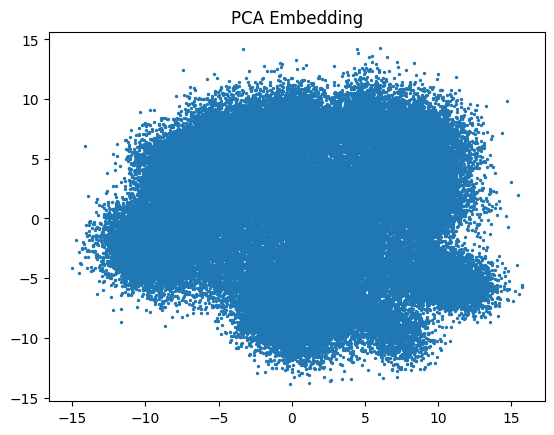

In [13]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], s=2)
plt.title("PCA Embedding")
plt.show()

In [14]:
# ATTENTION: This can take a few minutes! n_jobs=-1 will occupy all your CPU cores
tsne = TSNE(n_components=2, verbose=1, n_jobs=-1)
reduced_embedding = tsne.fit_transform(encoder_df)
reduced_embedding

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 79998 samples in 0.006s...
[t-SNE] Computed neighbors for 79998 samples in 21.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 79998
[t-SNE] Computed conditional probabilities for sample 2000 / 79998
[t-SNE] Computed conditional probabilities for sample 3000 / 79998
[t-SNE] Computed conditional probabilities for sample 4000 / 79998
[t-SNE] Computed conditional probabilities for sample 5000 / 79998
[t-SNE] Computed conditional probabilities for sample 6000 / 79998
[t-SNE] Computed conditional probabilities for sample 7000 / 79998
[t-SNE] Computed conditional probabilities for sample 8000 / 79998
[t-SNE] Computed conditional probabilities for sample 9000 / 79998
[t-SNE] Computed conditional probabilities for sample 10000 / 79998
[t-SNE] Computed conditional probabilities for sample 11000 / 79998
[t-SNE] Computed conditional probabilities for sample 12000 / 79998
[t-SNE] Computed conditional probabilities for sa

array([[ 60.24857  ,  -2.5059848],
       [ -4.4430165,   9.52204  ],
       [ 63.3789   , -23.540901 ],
       ...,
       [-14.323531 , -38.492115 ],
       [-84.92923  ,  20.62689  ],
       [ 87.464836 ,  13.335811 ]], dtype=float32)

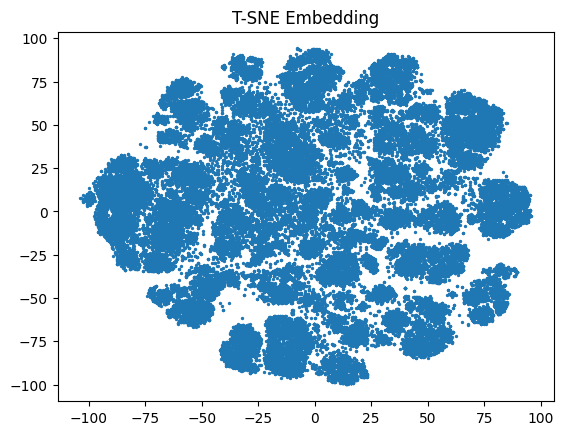

In [15]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], s=2)
plt.title("T-SNE Embedding")
plt.show()

## K_means

In [16]:
distorsions = []

ks = list(range(2,20))
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoder_df)
    distorsions.append(kmeans.inertia_)

C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users

Text(0.5, 1.0, 'Elbow curve')

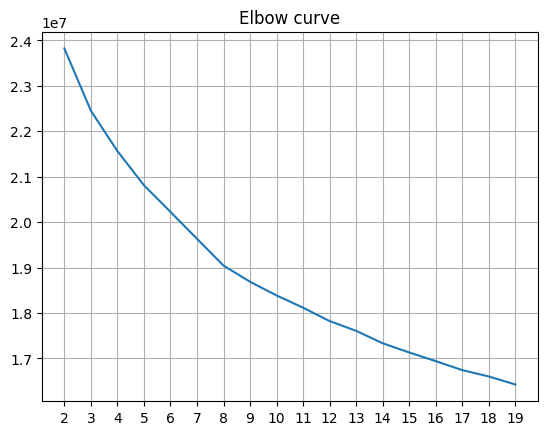

In [17]:
fig = plt.figure()
plt.plot(ks, distorsions)
plt.xticks(ks)
plt.grid(True)
plt.title('Elbow curve')

In [38]:
k_means = cluster.KMeans(n_clusters=8, random_state=42)
k_means.fit(encoder_df)

original_predictions = k_means.predict(encoder_df)

C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [39]:
unique, counts = np.unique(original_predictions, return_counts=True)
cluster_count_dict = {u:c for u, c in zip(unique, counts)} 

cluster_count_dict

{0: 11700, 1: 12219, 2: 9235, 3: 7077, 4: 15691, 5: 7882, 6: 6903, 7: 9291}

In [40]:
test_df = stragety_df.copy()
test_df['prediction'] = original_predictions

for cluster_idx in range(11):
    print(f"Cluster {cluster_idx}")
    print(test_df[test_df['prediction'] == cluster_idx]['Stragety'].value_counts()[:3])
    print()

Cluster 0
Vanguard Dark Star Sniper    6684
Dark Star Sniper             4237
Dark Star Infiltrator         455
Name: Stragety, dtype: int64

Cluster 1
Chrono Blademaster                 6873
Cybernetic Blademaster Vanguard    3063
Blaster Brawler                     827
Name: Stragety, dtype: int64

Cluster 2
Celestial Blademaster        4237
Protector Mystic             2423
Vanguard Dark Star Sniper    1388
Name: Stragety, dtype: int64

Cluster 3
Star Guardian Sorcerer               5747
Mech Sorcerer Guardian                784
Star Guardian Sorcerer Protectorr     326
Name: Stragety, dtype: int64

Cluster 4
Blaster Brawler                    10674
Cybernetic Blademaster Vanguard     3679
Chrono Blademaster                   991
Name: Stragety, dtype: int64

Cluster 5
Mech Infiltrator Valkyrie    3122
Brawler Void                 2134
Star Guardian Sorcerer        601
Name: Stragety, dtype: int64

Cluster 6
Mech Infiltrator Valkyrie    6345
Mech Sorcerer Guardian        316
Mech So

### PCA Visualisation on clustering results

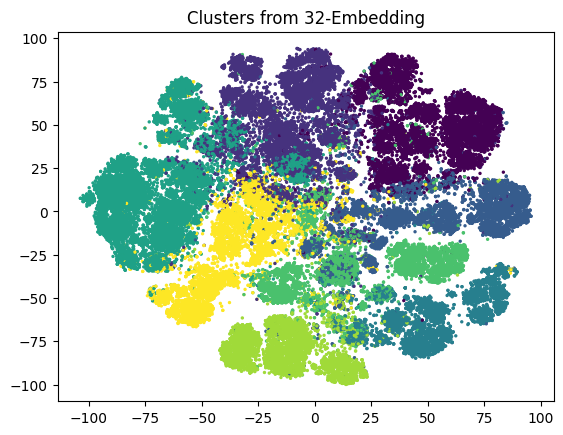

In [58]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=original_predictions, s=2)
plt.title(f"Clusters from 32-Embedding")
plt.show()

C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



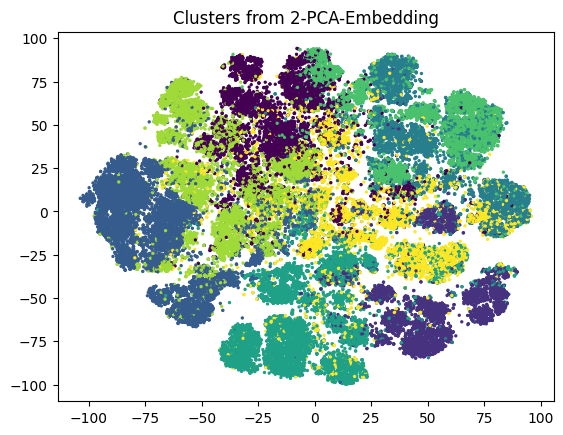

C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



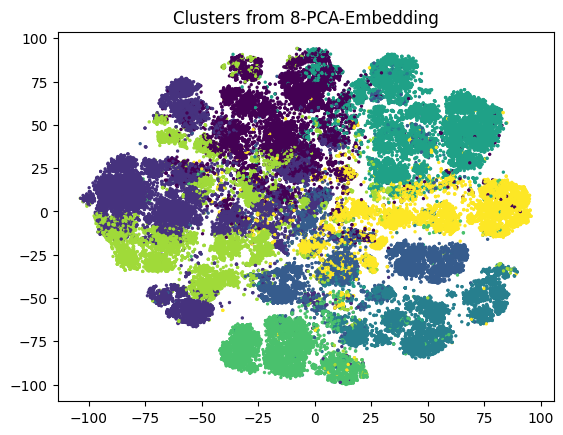

In [59]:
for n in [2, 8]:
    pca = PCA(n_components=n)
    transformed_df = pca.fit_transform(encoder_df)
    
    local_k_means = cluster.KMeans(n_clusters=8, random_state=42)
    local_k_means.fit(transformed_df)
    preds = local_k_means.predict(transformed_df)
    
    plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=preds, s=2)
    plt.title(f"Clusters from {n}-PCA-Embedding")
    plt.show()

C:\Users\Business\anaconda3\envs\tft\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



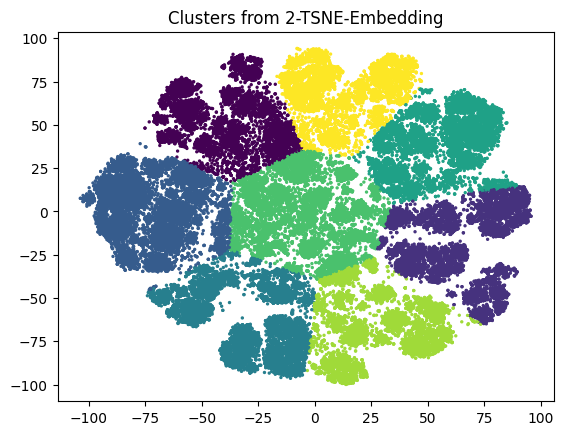

In [57]:
local_k_means = cluster.KMeans(n_clusters=8, random_state=42)
local_k_means.fit(reduced_embedding)
preds = local_k_means.predict(reduced_embedding)

plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=preds, s=2)
plt.title(f"Clusters from 2-TSNE-Embedding")
plt.show()

### Cluster Visualisation on original data

#### combination heatmap

Given the original dataframe and cluster predictions, it will generate the heatmap based on counting on different combination name and the average value of different combination. If normalised is set to True, the count will devided by the data size of coressponding cluster, resulting in 0 - 1 for all clusters

In [43]:
def generate_combination_heatmap(df, predictions, normalised=True):
    df = df.copy()
    df["prediction"] = predictions
    
    unique, counts = np.unique(predictions, return_counts=True)
    cluster_count_dict = {u:c for u, c in zip(unique, counts)} 
    
    combination_columns = [i for i in df.columns if i.startswith("combination_")]
    cluster_num = len(unique)
    
    x = [f"cluster_{i + 1}" for i in unique]
    y = [i[i.find("_") + 1:] for i in combination_columns]
    count_matrix = []
    average_matrix = []
    
    for col_name in combination_columns:
        counts = []
        averages = []
        for cluster in range(len(unique)):
            count = df[(df['prediction'] == cluster) & (df[col_name] != 0)].shape[0]
            averages.append(df[(df['prediction'] == cluster)][col_name].mean())
            counts.append(count / cluster_count_dict[cluster] if normalised else count)
        count_matrix.append(counts)
        average_matrix.append(averages)
        
    count_fig = px.imshow(count_matrix, x=x, y=y, aspect="auto", 
                          labels=dict(x="Cluster", y="Combination", color="Normalised Count" if normalised else "Count"))
    count_fig.update_layout(title_text='Combination Counts on Different Cluster', title_x=0.5)
    
    average_fig = px.imshow(average_matrix, x=x, y=y, aspect="auto", 
                          labels=dict(x="Cluster", y="Combination", color="Average Value"))
    average_fig.update_layout(title_text='Combination Average Value on Different Cluster', title_x=0.5)
    
    return count_fig, average_fig

In [44]:
count_fig, average_fig = generate_combination_heatmap(origial_df, original_predictions)
count_fig.show()
average_fig.show()

#### character heatmap

In [45]:
def generate_characters_heatmap(df, predictions, normalised=True):
    df = df.copy()
    df["prediction"] = predictions
    
    unique, counts = np.unique(predictions, return_counts=True)
    cluster_count_dict = {u:c for u, c in zip(unique, counts)} 
    
    x = [f"cluster_{i + 1}" for i in unique]
    y = [i for i in champion_index_dict]
    count_matrix = []
    average_matrix = []
    
    for character_name in y:
        counts = []
        averages = []
        for cluster in range(len(unique)):
            count = df[(df['prediction'] == cluster) & (df[character_name] != 0)].shape[0]
            averages.append(df[(df['prediction'] == cluster)][character_name].mean())
            counts.append(count / cluster_count_dict[cluster] if normalised else count)
        count_matrix.append(counts)
        average_matrix.append(averages)
        
    count_fig = px.imshow(count_matrix, x=x, y=y, aspect="auto", height=800,
                          labels=dict(x="Cluster", y="Character", color="Normalised Count" if normalised else "Count"))
    count_fig.update_layout(title_text='Character Counts on Different Cluster', title_x=0.5, yaxis_nticks=len(y))
    
    average_fig = px.imshow(average_matrix, x=x, y=y, aspect="auto", height=800, 
                          labels=dict(x="Cluster", y="Character", color="Average Star Value"))
    average_fig.update_layout(title_text='Character Average Star Value on Different Cluster', title_x=0.5, yaxis_nticks=len(y))
    
    return count_fig, average_fig

In [46]:
count_fig, average_fig = generate_characters_heatmap(character_df, original_predictions)
count_fig.show()
average_fig.show()

#### Item heatmap

In [47]:
def generate_items_heatmap(df, predictions, normalised=True):
    df = df.copy()
    df["prediction"] = predictions
    
    unique, counts = np.unique(predictions, return_counts=True)
    cluster_count_dict = {u:c for u, c in zip(unique, counts)} 
    
    x = [f"cluster_{i + 1}" for i in unique]
    y = [i for i in new_item_idx]
    count_matrix = []
    average_matrix = []
    
    for item_name in y:
        counts = []
        averages = []
        for cluster in range(len(unique)):
            count = df[(df['prediction'] == cluster) & (df[item_name] != 0)].shape[0]
            averages.append(df[(df['prediction'] == cluster)][item_name].mean())
            counts.append(count / cluster_count_dict[cluster] if normalised else count)
        count_matrix.append(counts)
        average_matrix.append(averages)
        
    count_fig = px.imshow(count_matrix, x=x, y=y, aspect="auto", height=800,
                          labels=dict(x="Cluster", y="Item", color="Normalised Count" if normalised else "Count"))
    count_fig.update_layout(title_text='Item Counts on Different Cluster', title_x=0.5, yaxis_nticks=len(y))
    
    average_fig = px.imshow(average_matrix, x=x, y=y, aspect="auto", height=800, 
                          labels=dict(x="Cluster", y="Item", color="Average Value"))
    average_fig.update_layout(title_text='Character Average Value on Different Cluster', title_x=0.5, yaxis_nticks=len(y))
    
    return count_fig, average_fig

In [48]:
count_fig, average_fig = generate_items_heatmap(item_df, original_predictions)
count_fig.show()
average_fig.show()

In [49]:
def generate_strategy_heatmap(df, predictions, normalised=True):
    df = df.copy()
    df["prediction"] = predictions
    
    unique, counts = np.unique(predictions, return_counts=True)
    cluster_count_dict = {u:c for u, c in zip(unique, counts)} 
    
    strategy_columns = [i for i in df.columns[:-2]]
    cluster_num = len(unique)
    
    x = [f"cluster_{i + 1}" for i in unique]
    y = [i for i in strategy_columns]
    count_matrix = []
    
    for col_name in strategy_columns:
        counts = []
        for cluster in range(len(unique)):
            count = df[(df['prediction'] == cluster) & (df['Stragety'] == col_name)].shape[0]
            counts.append(count / cluster_count_dict[cluster] if normalised else count)
        count_matrix.append(counts)
        
    count_fig = px.imshow(count_matrix, x=x, y=y, aspect="auto", 
                          labels=dict(x="Cluster", y="stragety", color="Normalised Count" if normalised else "Count"))
    count_fig.update_layout(title_text='Stragety Counts on Different Cluster', title_x=0.5)
    
    return count_fig

In [50]:
original_stragety_df = pd.read_csv("stragety_evaluation.csv", index_col=0)
original_stragety_df
fig = generate_strategy_heatmap(original_stragety_df, original_predictions)
fig.show()

# Visualize clusters in reduced embedding

In [51]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=predictions, s=2)
plt.title("T-SNE visualisation of 11 clusters from 32-Embedding")
plt.show()

NameError: name 'predictions' is not defined

Lets see what happens if we cluster the reduced embedding instead of the 32 dimensions.
According to the internet 10 dimensions is already too many dimensions for K-Means

In [ ]:
distorsions = []
ks = list(range(2,40))
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_embedding)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(ks, distorsions)
plt.xticks(ks)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
best_k = 10
k_means = cluster.KMeans(n_clusters=best_k, random_state=42)
k_means.fit(reduced_embedding)
predictions = k_means.predict(reduced_embedding)

In [ ]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=predictions, s=2)
plt.title(f"{best_k} T-SNE clusters from 2-PCA-Embedding")
plt.show()

Okay this doesn't really work, the clusters generated from 2 dimensions make no sense.
Maybe we removed too much information? Let's try with more dimensions.

Since it seems like T-SNE cannot **efficiently** handle a reduction to more than 3 dimensions, I will use PCA instead

In [ ]:
pca = PCA(n_components=8)
pca_embedding = pca.fit_transform(encoder_df)

In [ ]:
distorsions = []
ks = list(range(2,40))
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_embedding)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(ks, distorsions)
plt.xticks(ks)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
best_k = 11
k_means = cluster.KMeans(n_clusters=best_k, random_state=42)
k_means.fit(pca_embedding)
pca_predictions = k_means.predict(pca_embedding)

In [ ]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=pca_predictions, s=2)
plt.title(f"T-SNE visualisation of {best_k} clusters from {8}-PCA-Embedding")
plt.show()

In [ ]:
test_df = stragety_df.copy()
test_df['prediction'] = pca_predictions

for cluster_idx in range(11):
    print(f"Cluster {cluster_idx}")
    print(test_df[test_df['prediction'] == cluster_idx]['Stragety'].value_counts()[:3])
    print()

In [ ]:
pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(encoder_df)

In [ ]:
best_k = 11
k_means = cluster.KMeans(n_clusters=best_k, random_state=42)
k_means.fit(pca_embedding)
pca_predictions = k_means.predict(pca_embedding)

In [ ]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=pca_predictions, s=2)
plt.title(f"T-SNE visualisation of {best_k} clusters from {2}-PCA-Embedding")
plt.show()

In [ ]:
test_df = stragety_df.copy()
test_df['prediction'] = pca_predictions

for cluster_idx in range(11):
    print(f"Cluster {cluster_idx}")
    print(test_df[test_df['prediction'] == cluster_idx]['Stragety'].value_counts()[:3])
    print()

In [ ]:
best_k = 11
k_means = cluster.KMeans(n_clusters=best_k, random_state=42)
k_means.fit(reduced_embedding)
pca_predictions = k_means.predict(reduced_embedding)

In [ ]:
plt.scatter(reduced_embedding[:,0], reduced_embedding[:,1], c=pca_predictions, s=2)
plt.title(f"T-SNE visualisation of {best_k} clusters from T-SNE embedding")
plt.show()